Tools used: 
- sra-tools https://github.com/ncbi/sra-tools 
- seqtk https://github.com/lh3/seqtk
- colord (original) https://github.com/refresh-bio/CoLoRd ; compiled with `MEASURE_THREADS_TIMES` defined
- colord (partial compression - only for slightly more convenient parsing) https://gitee.com/MGI-EU-AF/colord-partial-compression
- pandas, matplotlib, tqdm... 

# Download data from SRA
ecoli ONT sequencing with different coverage

search query: (e.coli[Organism]) AND "oxford nanopore"[Platform] 

20-60 Mb:
- https://www.ncbi.nlm.nih.gov/sra/SRX19289568[accn]
- https://www.ncbi.nlm.nih.gov/sra/SRX19289564[accn]
- https://www.ncbi.nlm.nih.gov/sra/SRX19289523[accn]
- https://www.ncbi.nlm.nih.gov/sra/SRX19289528[accn]
- https://www.ncbi.nlm.nih.gov/sra/SRX19289529[accn]
- https://www.ncbi.nlm.nih.gov/sra/SRX19289377[accn]

bigger files:
- https://www.ncbi.nlm.nih.gov/sra/SRX19265375[accn]  272.9 Mb
- https://www.ncbi.nlm.nih.gov/sra/SRX19265376[accn]  471.9 Mb
- https://www.ncbi.nlm.nih.gov/sra/SRX9652579[accn] 590 Mb
- https://www.ncbi.nlm.nih.gov/sra/ERX10247740[accn] 680 Mb
- https://www.ncbi.nlm.nih.gov/sra/SRX18744792[accn] 794 Mb
- https://www.ncbi.nlm.nih.gov/sra/SRX18744544[accn] 969 Mb
- https://www.ncbi.nlm.nih.gov/sra/SRX9652574[accn] 1.2 Gb
- https://www.ncbi.nlm.nih.gov/sra/SRX18997756[accn] 1.7 Gb

In [84]:
import os
import time
import subprocess as sp
from collections import OrderedDict
from tqdm import tqdm

import pandas as pd
import matplotlib.pyplot as plt

In [78]:
mkdir -p data

In [149]:
links=""" https://www.ncbi.nlm.nih.gov/sra/SRX19289568[accn]
https://www.ncbi.nlm.nih.gov/sra/SRX19289564[accn]
https://www.ncbi.nlm.nih.gov/sra/SRX19289523[accn]
https://www.ncbi.nlm.nih.gov/sra/SRX19289528[accn]
https://www.ncbi.nlm.nih.gov/sra/SRX19289529[accn]
https://www.ncbi.nlm.nih.gov/sra/SRX19289377[accn]""".splitlines()
ACCNs = [link.split('/')[-1].rstrip().removesuffix('[accn]') for link in links]


links_bigger = """https://www.ncbi.nlm.nih.gov/sra/SRX19265375[accn] 272.9 Mb
https://www.ncbi.nlm.nih.gov/sra/SRX19265376[accn] 471.9 Mb
https://www.ncbi.nlm.nih.gov/sra/SRX9652579[accn] 590 Mb
https://www.ncbi.nlm.nih.gov/sra/ERX10247740[accn] 680 Mb
https://www.ncbi.nlm.nih.gov/sra/SRX18744792[accn] 794 Mb
https://www.ncbi.nlm.nih.gov/sra/SRX18744544[accn] 969 Mb
https://www.ncbi.nlm.nih.gov/sra/SRX9652574[accn] 1.2 Gb
https://www.ncbi.nlm.nih.gov/sra/SRX18997756[accn] 1.7 Gb""".splitlines()

ACCNs_bigger = [link.split('/')[-1].rstrip().split()[0].removesuffix('[accn]') for link in links_bigger]
ACCNs.extend(ACCNs_bigger)

ACCNs

['SRX19289568',
 'SRX19289564',
 'SRX19289523',
 'SRX19289528',
 'SRX19289529',
 'SRX19289377',
 'SRX19265375',
 'SRX19265376',
 'SRX9652579',
 'ERX10247740',
 'SRX18744792',
 'SRX18744544',
 'SRX9652574',
 'SRX18997756']

In [150]:
data_folder = 'data/'

for accn in ACCNs:
    print(accn)
    filename = data_folder + accn + ".fastq"
    prs = []
    if not os.path.isfile(filename):
        # pr = run(['fasterq-dump', accn])
        prs.append(sp.Popen(['fasterq-dump', accn], cwd=data_folder))
    
for pr in prs:
    pr.wait()

SRX19289568
SRX19289564
SRX19289523
SRX19289528
SRX19289529
SRX19289377
SRX19265375
SRX19265376
SRX9652579
ERX10247740
SRX18744792
SRX18744544
SRX9652574
SRX18997756


spots read      : 246,448
reads read      : 246,448
reads written   : 246,448


In [151]:
def check_download_finish():
    for file in os.listdir('data'):
        if '.tmp.' in file:
            return False
    return True

nsec = 30
while not check_download_finish():
    time.sleep(nsec*1000)

In [161]:
! ls -lhS data/*.fastq

-rw-r--r-- 1 iam28th wheel 3.8G Feb 14 21:21 data/SRX18997756.fastq
-rw-r--r-- 1 iam28th wheel 2.7G Feb 14 13:31 data/SRX9652574.fastq
-rw-r--r-- 1 iam28th wheel 2.1G Feb 14 14:56 data/SRX18744544.fastq
-rw-r--r-- 1 iam28th wheel 1.8G Feb 14 14:46 data/SRX18744792.fastq
-rw-r--r-- 1 iam28th wheel 1.6G Feb 14 14:40 data/ERX10247740.fastq
-rw-r--r-- 1 iam28th wheel 1.3G Feb 14 14:36 data/SRX9652579.fastq
-rw-r--r-- 1 iam28th wheel 1.1G Feb 14 12:48 data/SRX19265376.fastq
-rw-r--r-- 1 iam28th wheel 640M Feb 14 12:36 data/SRX19265375.fastq
-rw-r--r-- 1 iam28th wheel 120M Feb 13 17:33 data/SRX19289528.fastq
-rw-r--r-- 1 iam28th wheel 109M Feb 13 17:32 data/SRX19289529.fastq
-rw-r--r-- 1 iam28th wheel  85M Feb 13 17:32 data/SRX19289564.fastq
-rw-r--r-- 1 iam28th wheel  43M Feb 13 17:31 data/SRX19289568.fastq
-rw-r--r-- 1 iam28th wheel  30M Feb 13 17:31 data/SRX19289377.fastq
-rw-r--r-- 1 iam28th wheel  15M Feb 13 17:31 data/SRX19289523.fastq


# Generate `.fasta` files

In [152]:
filenames = []
fastas = []

for accn in tqdm(ACCNs):
    filename = data_folder + accn + ".fastq"
    filenames.append(filename)
    
    fasta = data_folder + accn + '.fasta'
    fastas.append(fasta)
    
    cmd = f"seqtk seq -A {filename} > {fasta}"
    sp.run(cmd, shell=True, check=True)

100%|███████████████████████████| 14/14 [00:25<00:00,  1.83s/it]


# Calculate coverage
https://bionumbers.hms.harvard.edu/bionumber.aspx?id=100269

E.coli genome sizes may vary, so assuming genome size from the link above.

In [153]:
GENOME_SIZE = 4639221

coverages = []
for filename in tqdm(filenames):
    
    seqtk = sp.Popen(['seqtk', 'fqchk', filename], stdout=sp.PIPE)
    head = sp.check_output(['head', '-n', '3'], stdin=seqtk.stdout).decode('utf8')

    nbases = int(head.splitlines()[-1].split()[1])
    coverages.append(nbases / GENOME_SIZE)
print(*filenames, sep='\t')
print(*coverages, sep='\t')

100%|███████████████████████████| 14/14 [01:29<00:00,  6.39s/it]

data/SRX19289568.fastq	data/SRX19289564.fastq	data/SRX19289523.fastq	data/SRX19289528.fastq	data/SRX19289529.fastq	data/SRX19289377.fastq	data/SRX19265375.fastq	data/SRX19265376.fastq	data/SRX9652579.fastq	data/ERX10247740.fastq	data/SRX18744792.fastq	data/SRX18744544.fastq	data/SRX9652574.fastq	data/SRX18997756.fastq
4.8156781063027605	9.494405418495907	1.6710365813570855	13.488827973489515	12.254720350679564	3.2928483036268372	70.74481276059062	123.08722477329707	147.23597797992377	172.8550614424275	198.49103006733242	238.69056313549194	301.51176652287097	431.1129090422724


# Run CoLoRd for all files

In [154]:
logs = []
CLRD="../MGI/colord-partial-compression/bin/colord"

# fastq
for inp in tqdm(filenames):
    out = inp.removesuffix('.fastq') + '.ont-default'
    log = inp.removesuffix('.fastq') + '.ont-default.log'
    
    logs.append(log)
    
    threads_times = dict()
    section_cr = dict()
    
    if not os.path.isfile(log):
        cmd = [CLRD, 'compress-ont', inp, out, '--verbose', '--section', 'all', '2>', log]
        cmd = ' '.join(cmd)
        pr = sp.run(cmd, shell=True, capture_output=True, check=True)
        
# fasta
logs_fasta = []
for inp in tqdm(fastas):
    out = inp + '.ont-default'
    log = inp + '.ont-default.log'
    
    logs_fasta.append(log)
    
    threads_times = dict()
    section_cr = dict()
    
    if not os.path.isfile(log):
        cmd = ["colord-ori", 'compress-ont', inp, out, '--verbose', '2>', log]
        cmd = ' '.join(cmd)
        pr = sp.run(cmd, shell=True, capture_output=True, check=True)

100%|███████████████████████████| 14/14 [04:30<00:00, 19.34s/it]


# Calculate running time and CR

In [155]:
l_threads_times = []
l_section_cr = []

# fastq
for i, inp in tqdm(enumerate(filenames)):
    log = logs[i]
    
    threads_times = OrderedDict()
    section_cr = OrderedDict()
    
    cmd = ['grep -A 26 "Threads times summary"', log]
    cmd = ' '.join(cmd)
    pr = sp.run(cmd, shell=True, capture_output=True, check=True)
    output = pr.stdout.decode('utf8').splitlines()
    
    thr = output[1:13]
    thr.append(output[-5])  # total time
    thr[-1] = thr[-1].rstrip('s')
    
    for line in thr:
        section, times = line.split(':')
        section = section.strip().replace('sorted', 'sum')
        times = [float(x) for x in times.split()]
        
        threads_times[section] = sum(times)
    
    l_threads_times.append(threads_times)
        
    cr = output[-3:]
    for line in cr:
        section, ori, compr = line.split()
        ori = int(ori)
        compr = int(compr)
        section_cr[section] = ori / compr
    l_section_cr.append(section_cr)
    
# fasta
l_tt_fasta = []
for log in tqdm(logs_fasta):
    with open(log, 'r') as f:
        # print(*f.readlines())
        for line in f:
            if "Total time" in line:
                tt = float(line.split(' : ')[1].rstrip().rstrip('s'))
                l_tt_fasta.append(tt)
                break

14it [00:00, 264.78it/s]
100%|█████████████████████████| 14/14 [00:00<00:00, 3776.22it/s]


In [156]:
l_threads_times[0]

OrderedDict([('reader', 0.141275),
             ('similarity finder', 0.025023),
             ('similarity finder internal (sum)', 0.31319400000000003),
             ('mean similarity finder internal', 0.0391493),
             ('encoders (sum)', 16.229635),
             ('mean encoders', 2.31852),
             ('encoders wait on queue (sum)', 0.8580321999999998),
             ('mean encoders wait on queue', 0.122576),
             ('entr. compr.', 0.480801),
             ('entr. compr. qual.', 0.332735),
             ('entr. compr. header', 0.046456),
             ('store result', 0.000882),
             ('Total time', 4.46283)])

In [157]:
df = dict()
columns = ['Coverage', 'CR_dna', 'CR_qual', 'CR_header']

for k, v in l_threads_times[0].items():
    columns.append('Time ' + k if not k[0].isupper() else k)
    
io_threads = ['reader', 'store result']
entr_threads = [k for k in l_threads_times[0] if k.startswith('entr.')]
graph_threads = [k for k in l_threads_times[0] if (k.startswith('similarity') or k.startswith('encoders'))]

columns.extend(['Time - IO', 
                'Time - Sim.Graph', 
                'Time - RangeCoding'
               ])
columns.append('Total time (fasta)')

for i, ac in enumerate(ACCNs):
    
    df[ac] = [
        coverages[i],
        l_section_cr[i]['dna'],
        l_section_cr[i]['qual'],
        l_section_cr[i]['header'],
    ]
    
    for k, v in l_threads_times[i].items():
        df[ac].append(v)
        
    df[ac].extend([
        sum(l_threads_times[i][thr] for thr in io_threads),
        sum(l_threads_times[i][thr] for thr in graph_threads),
        sum(l_threads_times[i][thr] for thr in entr_threads),
    ])
    df[ac].append(l_tt_fasta[i])
    
        
df = pd.DataFrame(df).T
df.columns = columns
df.sort_values(by='Coverage', inplace=True)
df

,Coverage,CR_dna,CR_qual,CR_header,Time reader,Time similarity finder,Time similarity finder internal (sum),Time mean similarity finder internal,Time encoders (sum),Time mean encoders,...,Time mean encoders wait on queue,Time entr. compr.,Time entr. compr. qual.,Time entr. compr. header,Time store result,Total time,Time - IO,Time - Sim.Graph,Time - RangeCoding,Total time (fasta)
SRX19289523,1.671037,4.194829,6.912822,21.120719,0.045247,0.004852,0.111221,0.013903,8.700475,1.24292,...,0.058954,0.184692,0.118726,0.039494,0.000521,5.34217,0.045768,9.229228,0.342912,5.35639
SRX19289377,3.292848,4.806064,7.060019,21.788841,0.101283,0.021973,0.221236,0.027654,8.076137,1.15373,...,0.103579,0.321129,0.224774,0.044656,0.000568,3.27940,0.101851,9.044398,0.590559,3.51969
SRX19289568,4.815678,4.792014,7.031542,21.235416,0.141275,0.025023,0.313194,0.039149,16.229635,2.31852,...,0.122576,0.480801,0.332735,0.046456,0.000882,4.46283,0.142157,17.425884,0.859992,4.62754
SRX19289564,9.494405,6.518760,7.114094,20.674055,0.311206,0.105193,0.741007,0.092626,32.820790,4.68869,...,0.155949,0.732746,0.640256,0.044150,0.001001,7.01944,0.312207,34.758631,1.417152,7.28679
SRX19289529,12.254720,7.081151,7.122395,20.372332,0.411997,0.169507,1.016823,0.127103,36.160090,5.16573,...,0.172194,0.892248,0.825703,0.049858,0.001302,7.47043,0.413299,38.551780,1.767809,7.83103
SRX19289528,13.488828,7.450728,7.135649,20.267986,0.435782,0.221641,1.182376,0.147797,40.499780,5.78568,...,0.182960,0.978080,0.929768,0.049160,0.001331,7.96063,0.437113,43.184516,1.957008,8.49605
SRX19265375,70.744813,8.644514,7.932377,26.583206,2.604120,2.280270,6.900063,0.862508,179.356300,25.62230,...,0.233104,7.248500,7.406810,0.155527,0.000084,31.39420,2.604204,190.168359,14.810837,30.47940
SRX19265376,123.087225,11.705574,9.030061,24.924535,4.766650,5.559940,12.952620,1.619080,397.448900,56.77840,...,0.246240,9.725790,13.496000,0.150295,0.000136,65.66320,4.766786,417.685144,23.372085,64.76070
SRX9652579,147.235978,12.979726,7.763380,23.007134,5.538040,7.584100,16.480570,2.060070,511.459800,73.06570,...,0.298914,10.859500,17.556300,0.139425,0.000005,85.73500,5.538045,537.616864,28.555225,82.08510
ERX10247740,172.855061,14.515601,10.414832,23.605663,6.701270,10.545000,19.601090,2.450130,695.418300,99.34540,...,0.319791,12.169300,19.094100,0.107032,0.000008,110.82400,6.701278,727.802929,31.370432,108.80000


# Visualizations...

In [178]:
SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

SCATTER_S = 50

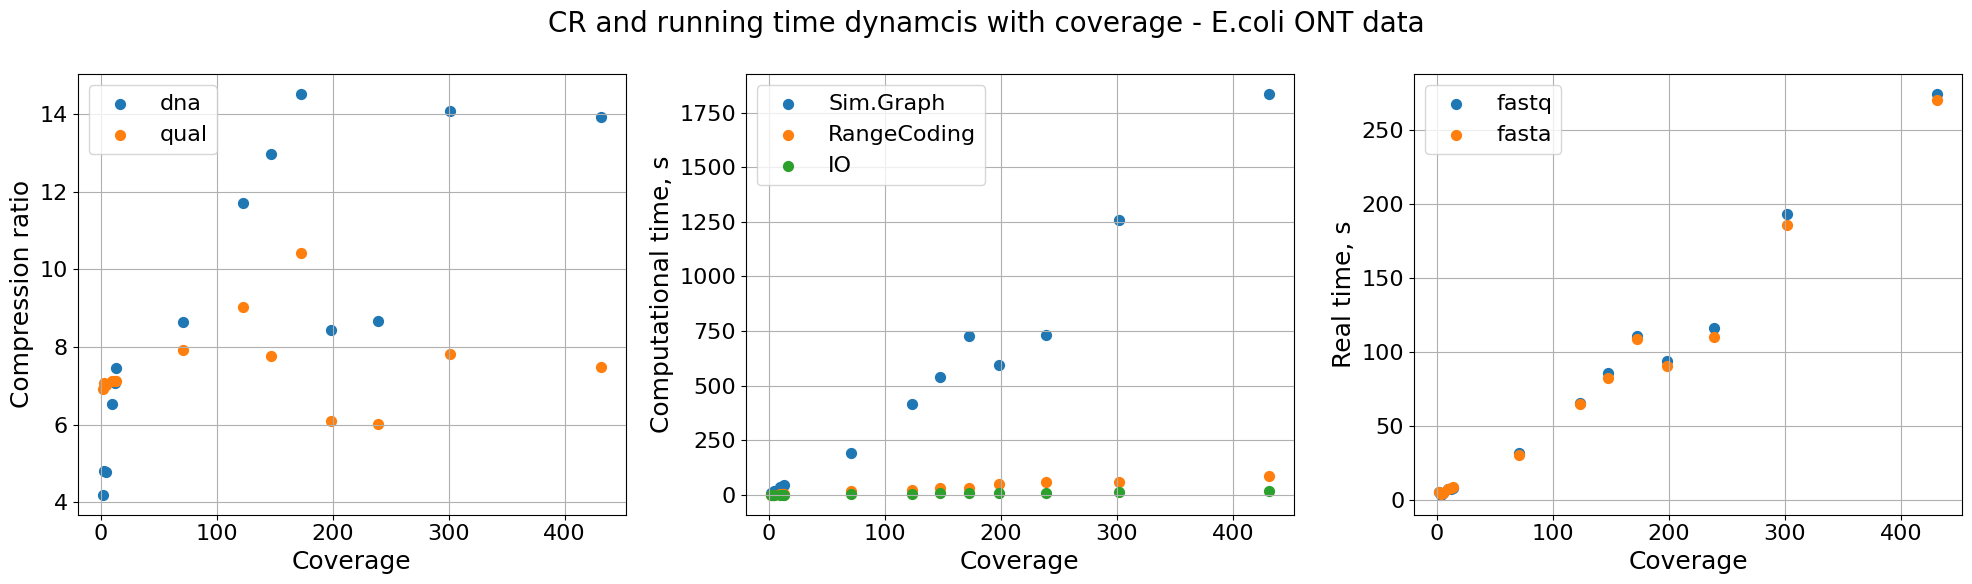

In [179]:
# fig 1 : coverage vs CR and time
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('CR and running time dynamcis with coverage - E.coli ONT data')
    
ax = axs[0]
for section in ('dna', 'qual'):
    x = df['Coverage']
    y = df['CR_' + section]
    ax.scatter(x, y, label=section, s=SCATTER_S)
ax.set_ylabel('Compression ratio')

# fig 2 : coverage vs computational time
ax = axs[1]
ax.set_ylabel('Computational time, s')
for section in ('Sim.Graph', 'RangeCoding', 'IO'):
    x = df['Coverage']
    y = df['Time - ' + section]
    ax.scatter(x, y, label=section, s=SCATTER_S)
    
# fig 3 : coverage vs real time for fasta and fastq
ax = axs[2]
ax.set_ylabel('Real time, s')
for fmt in ('fastq', 'fasta'):
    x = df['Coverage']
    if fmt == 'fastq':
        y = df['Total time']
    else:
        y = df['Total time (fasta)']
    ax.scatter(x, y, label=fmt, s=SCATTER_S)

for ax in axs:
    ax.legend();
    ax.grid();
    ax.set_xlabel('Coverage')
    
fig.tight_layout();